## Principal Component Analysis

### Loading the Data and Taking a look at it

In [38]:
import pandas as pd

X = pd.read_excel("./Datasets/Filtered_features.xlsx")

print(X.head())

   Gender  Senior Citizen  Partner  Dependents  Multiple Lines  \
0       1               0        0           0               0   
1       0               0        0           1               0   
2       0               0        0           1               1   
3       0               0        1           1               1   
4       1               0        0           1               1   

   Online Security  Online Backup  Device Protection  Tech Support  \
0                1              1                  0             0   
1                0              0                  0             0   
2                0              0                  1             0   
3                0              0                  1             1   
4                0              1                  1             0   

   Streaming TV  ...      CLTV  DSL_Service  month-to-month_contract  \
0             0  ... -0.981675            1                        1   
1             0  ... -1.436462        

Extracting features and labels

In [39]:
data_matrix = X.drop(columns=["Churn Value"])
y = X["Churn Value"]

print(data_matrix.head())

   Gender  Senior Citizen  Partner  Dependents  Multiple Lines  \
0       1               0        0           0               0   
1       0               0        0           1               0   
2       0               0        0           1               1   
3       0               0        1           1               1   
4       1               0        0           1               1   

   Online Security  Online Backup  Device Protection  Tech Support  \
0                1              1                  0             0   
1                0              0                  0             0   
2                0              0                  1             0   
3                0              0                  1             1   
4                0              1                  1             0   

   Streaming TV  ...  Total Charges      CLTV  DSL_Service  \
0             0  ...      -0.959649 -0.981675            1   
1             0  ...      -0.940457 -1.436462            0

Standardizing the Data matrix

In [40]:
mean = data_matrix.mean(axis=0)
std = data_matrix.std(axis=0)
data_standardized = (data_matrix - mean)/std

Performing Eigendecomposition by fitting standardized data.

In [41]:
from sklearn.decomposition import PCA

pca = PCA()
# fitting stardardized data
components = pca.fit(data_standardized).components_
# transpose
components = pd.DataFrame(components).transpose()
# index 
components.index = data_matrix.columns

print("Components: ")
print(components.head())

Components: 
                      0         1         2         3         4         5   \
Gender         -0.007428 -0.005718  0.007332  0.030290  0.043180  0.069109   
Senior Citizen  0.061064  0.233949 -0.121203  0.068620  0.025691 -0.169345   
Partner         0.157022 -0.175581 -0.285001 -0.040995 -0.020690  0.456205   
Dependents      0.008695 -0.241117 -0.219620 -0.135365 -0.019563  0.564464   
Multiple Lines  0.227779  0.127670 -0.309643  0.025446  0.037986 -0.070396   

                      6         7         8         9   ...        13  \
Gender          0.091843 -0.988185 -0.026646  0.018825  ...  0.006923   
Senior Citizen -0.075332 -0.045846  0.019567  0.675941  ...  0.043005   
Partner        -0.249367  0.003109 -0.139495  0.209471  ...  0.063945   
Dependents     -0.231157  0.024261 -0.218494  0.003938  ...  0.002371   
Multiple Lines  0.144404  0.021893 -0.108717  0.126637  ...  0.318287   

                      14        15        16        17        18        19  \
G

In [42]:
var_ratio = pca.explained_variance_ratio_
# saving the values as Dataframe
var_ratio = pd.DataFrame(var_ratio).transpose()

print("Variance Ratio: ")
print(var_ratio)

Variance Ratio: 
        0         1         2         3        4         5         6   \
0  0.20401  0.124087  0.067555  0.057317  0.05555  0.050377  0.046673   

        7         8         9   ...        13        14        15       16  \
0  0.04343  0.041259  0.039647  ...  0.029859  0.026758  0.026372  0.02457   

         17        18        19        20            21            22  
0  0.023905  0.020223  0.008335  0.005667  1.780670e-32  1.179567e-32  

[1 rows x 23 columns]


### Projecting the Data onto Principal Axes

In [43]:
pca = PCA(n_components=4)

data_pcomp = pca.fit_transform(data_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']

print(data_pcomp.head())

        PC1       PC2       PC3       PC4
0 -1.822854 -0.083609  2.585271 -0.887291
1 -2.311845  1.543271 -0.406980 -0.488541
2  0.832725  2.422649 -0.918041 -0.446916
3  2.123902  1.823771 -0.822505 -0.805020
4  2.415166  1.177931 -1.184683 -0.388503


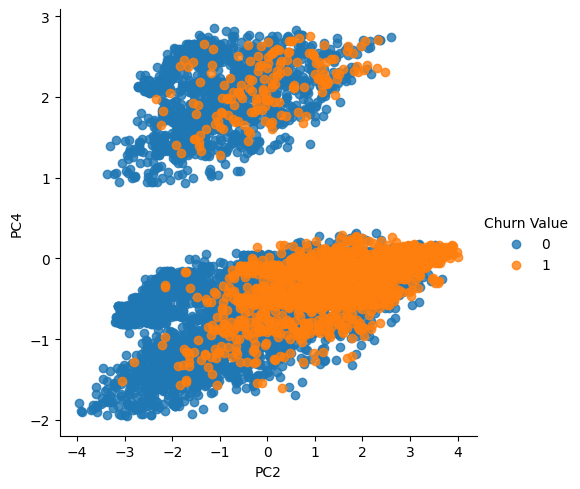

In [44]:
import seaborn as sns

data_pcomp["Churn Value"] = y

sns.lmplot(x='PC2', y='PC4', data=data_pcomp, hue='Churn Value',  fit_reg=False)

In [45]:
pca_features = data_pcomp

pca_features = pca_features.to_excel("./Datasets/PCA_features.xlsx")

In [46]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


# get principal component as 4 features and save as x
pca_1 = PCA(n_components=4)
X = pca_1.fit_transform(data_standardized)

# split the data into 33% testing and rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

# create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train)

# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')

# split the original data into 33% test and rest training
X_train, X_test, y_train, y_test = train_test_split(data_standardized, y, test_size=0.33, random_state=69)

# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')

Score for model with 4 PCA features: 0.7750969409737182
Score for model with original features: 0.7975010771219302
